In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir('D:\\DATA SCIENCE\\MACHINE LEARNING\\Simple Linear Regression\\')
os.getcwd()

'D:\\DATA SCIENCE\\MACHINE LEARNING\\Simple Linear Regression'

In [6]:
df1= pd.read_csv('Salary_Data.csv')
df1

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [7]:
#x independent variable
x= df1.iloc[:,:-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
#y dependent variables
y= df1.iloc[:,1].values
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

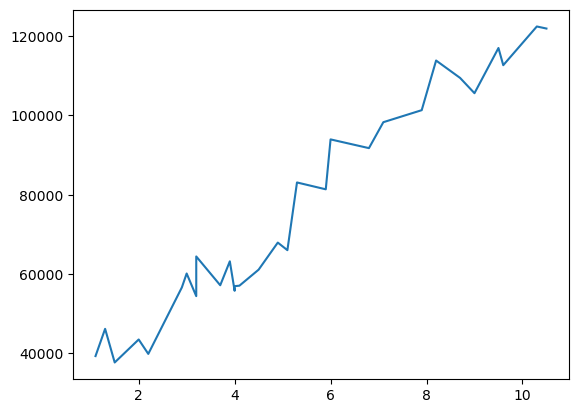

In [10]:
#creating a plot to check the trend
plt.plot(x,y)
plt.show()

In [14]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)
print('x shape',x.shape)
print('y shape',y.shape)
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)





x shape (30, 1)
y shape (30,)
x_train shape (24, 1)
x_test shape (6, 1)
y_train shape (24,)
y_test shape (6,)


In [15]:
#model fitting

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)
print(lr)

LinearRegression()


In [16]:
#prediction y=mx+c y=prediction m=coefficient x=experience c = intercept

y_pred = lr.predict(x_test)
print(y_pred)

[ 43967.50984057 102663.68593958 114970.94867002 115917.66118774
  35447.09718104  53434.63501783]


In [17]:
#y= mx +c (Coefficient and Interceptor Values) 
#Y= slope
print ('Coefficient', lr.coef_)
print ('Intercept', lr.intercept_)


Coefficient [9467.12517726]
Intercept 25033.25948605562


In [18]:
#display the prediction with difference

df_x_test = pd.DataFrame(x_test, columns=['Experience'])
df_y_test = pd.DataFrame(y_test, columns=['Salary'])
df_y_test_pred =pd.DataFrame(y_pred, columns=['Prediction'])
df_diff = df_y_test-df_y_test_pred
y_test_pred = pd.concat([df_x_test ,df_y_test, df_y_test_pred ],axis =1)
y_test_pred['Difference']= df_y_test ['Salary']- df_y_test_pred['Prediction']
print(y_test_pred)


   Experience  Salary     Prediction    Difference
0         2.0   43525   43967.509841   -442.509841
1         8.2  113812  102663.685940  11148.314060
2         9.5  116969  114970.948670   1998.051330
3         9.6  112635  115917.661188  -3282.661188
4         1.1   39343   35447.097181   3895.902819
5         3.0   60150   53434.635018   6715.364982


In [19]:
#accuracy of model
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print(accuracy)

0.9712732306413112


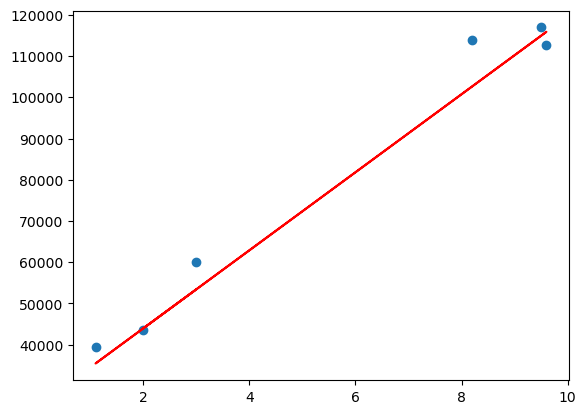

In [20]:
#test data
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,'r')
plt.show()

In [21]:
#now prediction of complete data
y_pred_final = lr.predict(x)
print(y_pred_final)

[ 35447.09718104  37340.52221649  39233.94725194  43967.50984057
  45860.93487603  52487.92250011  53434.63501783  55328.06005329
  55328.06005329  60061.62264191  61955.04767737  62901.76019509
  62901.76019509  63848.47271282  67635.32278372  71422.17285463
  73315.59789008  75209.02292553  80889.29803189  81836.01054961
  89409.71069142  92249.8482446   99823.5483864  102663.68593958
 107397.24852821 110237.38608139 114970.94867002 115917.66118774
 122544.64881183 124438.07384728]


In [22]:
#final result in dataframe storing in excel

y_pred_final = pd.DataFrame(y_pred_final,columns=['Prediction'])
result=pd.concat([df1,y_pred_final],axis=1)
result['Difference']=result['Salary']-result['Prediction']
print(result)
result.to_excel('D:\\DATA SCIENCE\\MACHINE LEARNING\\Simple Linear Regression\\prediction.xlsx')

    YearsExperience  Salary     Prediction    Difference
0               1.1   39343   35447.097181   3895.902819
1               1.3   46205   37340.522216   8864.477784
2               1.5   37731   39233.947252  -1502.947252
3               2.0   43525   43967.509841   -442.509841
4               2.2   39891   45860.934876  -5969.934876
5               2.9   56642   52487.922500   4154.077500
6               3.0   60150   53434.635018   6715.364982
7               3.2   54445   55328.060053   -883.060053
8               3.2   64445   55328.060053   9116.939947
9               3.7   57189   60061.622642  -2872.622642
10              3.9   63218   61955.047677   1262.952323
11              4.0   55794   62901.760195  -7107.760195
12              4.0   56957   62901.760195  -5944.760195
13              4.1   57081   63848.472713  -6767.472713
14              4.5   61111   67635.322784  -6524.322784
15              4.9   67938   71422.172855  -3484.172855
16              5.1   66029   7

In [23]:
from sklearn.metrics import r2_score
accuracy=r2_score(y,y_pred_final)
print(accuracy)

0.9563397583524935


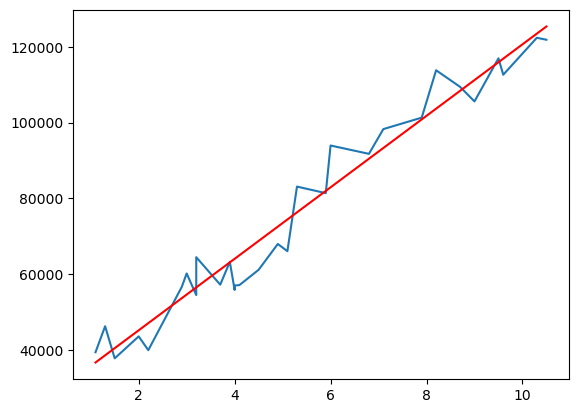

In [30]:
plt.plot(x,y)
plt.plot(x,y_pred_final,'red')
plt.show()

In [24]:
# Predict the salary for 12.2 years of experience
years_experience_to_predict = np.array([[12.2]])  # Note the double square brackets to make it a 2D array
predicted_salary = lr.predict(years_experience_to_predict)

# Print the predicted salary
print("Predicted Salary for 12.2 years of experience:", predicted_salary[0])

Predicted Salary for 12.2 years of experience: 140532.18664861843
